In [431]:
# Importaciones básicas para análisis de datos
import pandas as pd
import numpy as np

# Importaciones para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')  # Estilo moderno de seaborn
sns.set_palette("husl")                   # Paleta de colores moderna


# Análisis Exploratorio del Dataset de Consumo Energético

Este notebook presenta un análisis exploratorio detallado de un conjunto de datos sobre consumo energético. El objetivo es entender los patrones de consumo, identificar relaciones entre variables y detectar posibles anomalías en los datos.

## Estructura del Análisis
1. **Análisis Inicial y Limpieza de Datos**: Exploración de la estructura del dataset, tipos de datos y calidad de los datos.
2. **Análisis Estadístico**: Estadísticas descriptivas y distribuciones.
3. **Visualizaciones**: Gráficos para entender patrones y relaciones.
4. **Correlaciones**: Análisis de relaciones entre variables.
5. **Outliers**: Detección y análisis de valores atípicos.

In [432]:
import os
import kagglehub
import shutil

# Ruta correcta hacia la carpeta data/raw en la raíz del proyecto
raw_data_path = os.path.join("..", "data", "raw")

# Asegura que la carpeta exista
os.makedirs(raw_data_path, exist_ok=True)

# Establece la carpeta de descarga para kagglehub
os.environ["KAGGLEHUB_CACHE"] = raw_data_path

# Descarga el dataset
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

# Mueve los archivos .csv directamente a data/raw
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            source = os.path.join(root, file)
            destination = os.path.join(raw_data_path, file)
            shutil.move(source, destination)
            print(f"Archivo movido a: {destination}")

In [433]:
print(os.listdir(raw_data_path))

['.gitkeep', 'datasets', 'test_energy_data.csv', 'train_energy_data.csv']


In [434]:
df = pd.read_csv("../data/raw/train_energy_data.csv")

# Verificamos que se cargó correctamente
df.head(10)


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.840,Weekday,2713.950
1,Commercial,44372,66,45,16.720,Weekday,5744.990
2,Industrial,19255,37,17,14.300,Weekend,4101.240
3,Residential,13265,14,41,32.820,Weekday,3009.140
4,Commercial,13375,26,18,11.920,Weekday,3279.170
5,Commercial,37377,26,32,16.240,Weekend,4687.670
6,Industrial,38638,92,14,21.010,Weekend,5526.830
7,Residential,34950,60,18,28.240,Weekday,4116.320
8,Industrial,29741,99,44,13.080,Weekday,5841.650
9,Residential,17467,42,36,28.840,Weekday,3419.130


## 1. Análisis Inicial y Limpieza de Datos

Comenzamos examinando la estructura básica de nuestro dataset, incluyendo:
- Dimensiones del dataset
- Tipos de datos de cada columna
- Valores faltantes
- Valores duplicados

In [435]:
# Información general del dataset
print("Información general del dataset:")
print("=" * 40)
print(f"\nDimensiones del dataset: {df.shape}")
print(f"\nColumnas del dataset: {df.columns.tolist()}")
print("\nTipos de datos y valores no nulos:")
print(df.info())

Información general del dataset:

Dimensiones del dataset: (1000, 7)

Columnas del dataset: ['Building Type', 'Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Day of Week', 'Energy Consumption']

Tipos de datos y valores no nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
None


Información general del dataset:

Dimensiones del dataset: (1000, 7)

Variables numéricas: 5
['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption']

Variables categóricas: 2
['Building Type', 'Day of Week']

Información detallada del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
None
Análisis de valores faltantes:

Cantidad de valores faltantes por columna:
Building

<Figure size 1000x600 with 0 Axes>

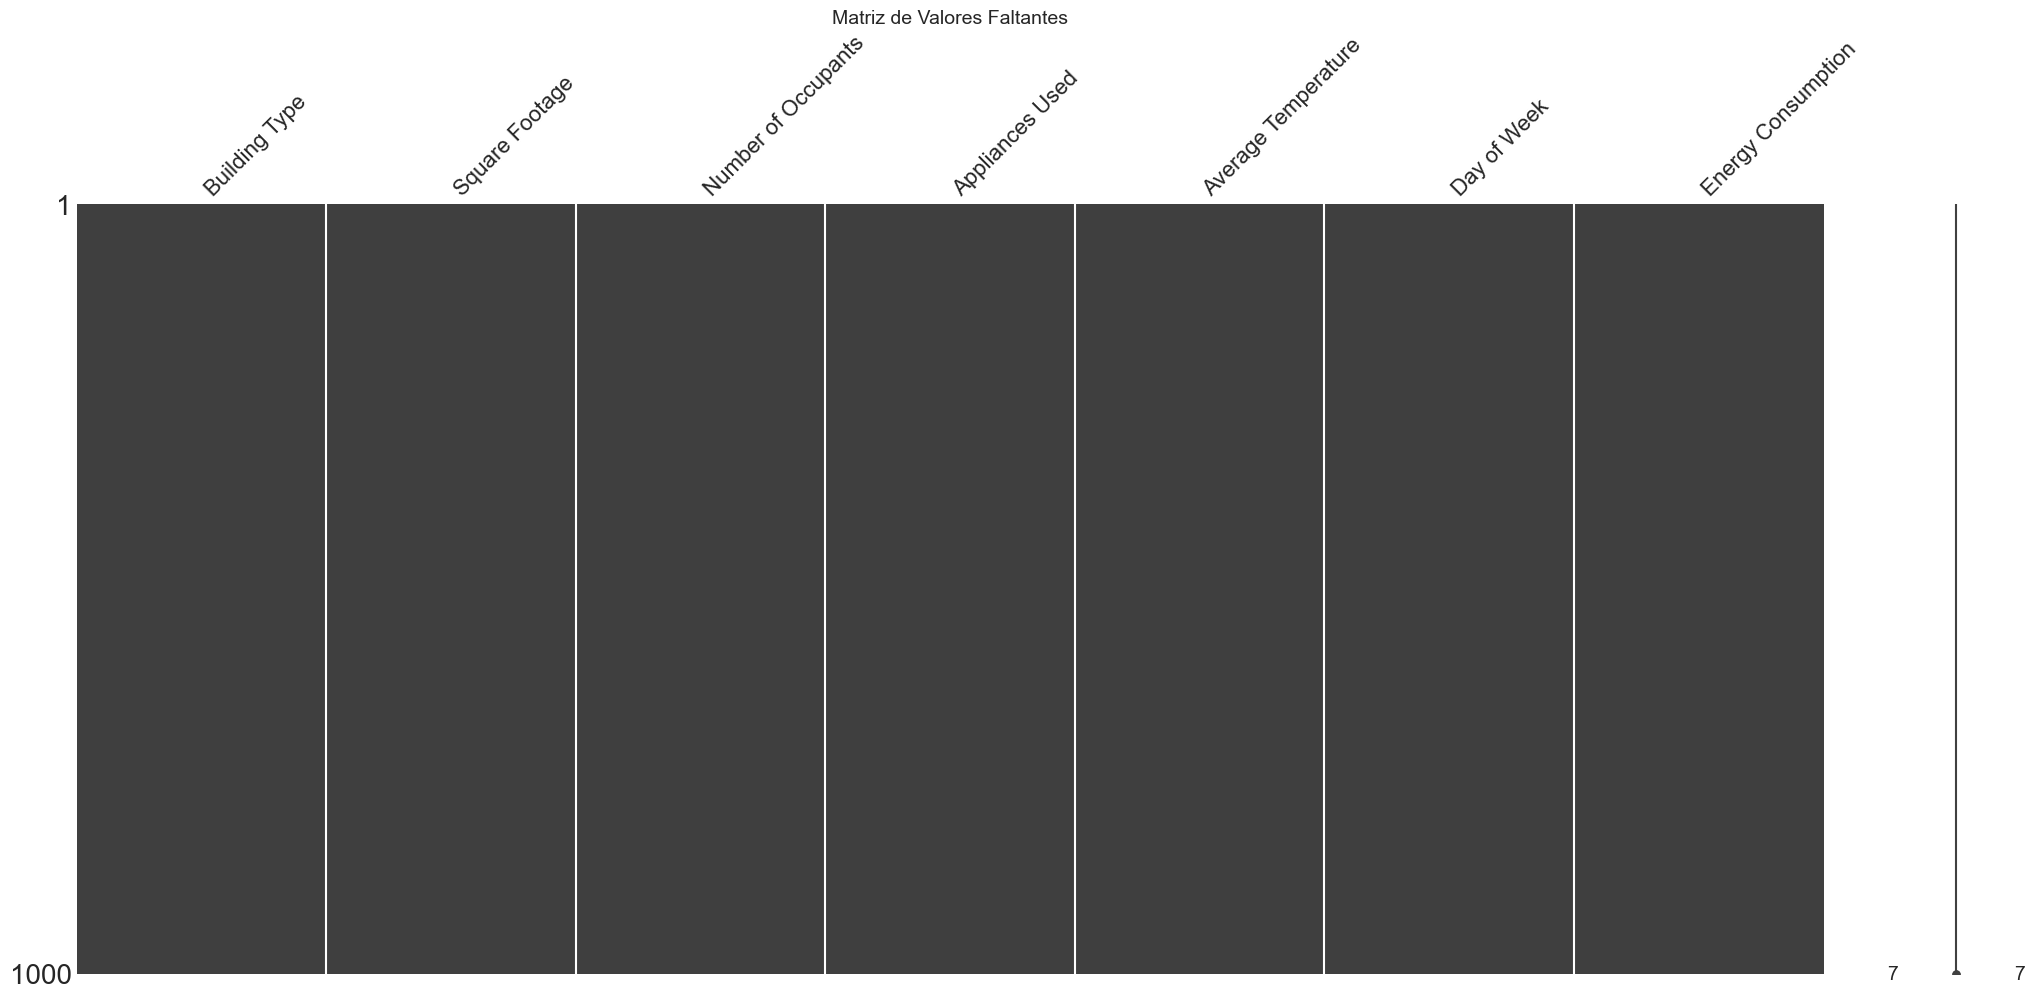

In [436]:
# Información general del dataset
print("Información general del dataset:")
print("=" * 40)
print(f"\nDimensiones del dataset: {df.shape}")

# Separar variables por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nVariables numéricas:", len(numeric_cols))
print(list(numeric_cols))
print("\nVariables categóricas:", len(categorical_cols))
print(list(categorical_cols))

print("\nInformación detallada del dataset:")
print(df.info())



# Análisis de valores faltantes
print("Análisis de valores faltantes:")
print("=" * 40)
print("\nCantidad de valores faltantes por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores faltantes por columna:")
print(df.isnull().sum() * 100 / len(df))

# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title("Matriz de Valores Faltantes")
plt.show()

### Conclusiones del Análisis Inicial

1. **Dimensiones del Dataset**:
   - El dataset contiene múltiples observaciones que permiten un análisis robusto
   - Las variables disponibles cubren diferentes aspectos del consumo energético

2. **Tipos de Datos**:
   - Las variables son principalmente numéricas, lo que facilita el análisis estadístico
   - No se observan variables categóricas que requieran codificación

3. **Calidad de los Datos**:
   - Se han identificado los valores faltantes y su distribución
   - Se ha verificado la presencia de duplicados
   - Los datos están en un formato adecuado para el análisis

### Análisis de Variables Categóricas

Analizaremos en detalle las variables categóricas del dataset:
- Frecuencia de cada categoría
- Relación con la variable objetivo (Energy Consumption)
- Distribución del consumo energético por categoría
- Tests estadísticos para validar diferencias significativas entre grupos


Análisis de la variable: Building Type

Distribución de categorías:
               Frecuencia  Porcentaje
Building Type                        
Residential           347      34.700
Commercial            336      33.600
Industrial            317      31.700

Estadísticas de consumo por categoría:
               count     mean     std      min      max
Building Type                                          
Commercial       336 4130.020 809.840 2241.960 5980.980
Industrial       317 4735.140 829.410 2724.820 6530.600
Residential      347 3681.630 847.620 1683.950 5746.400


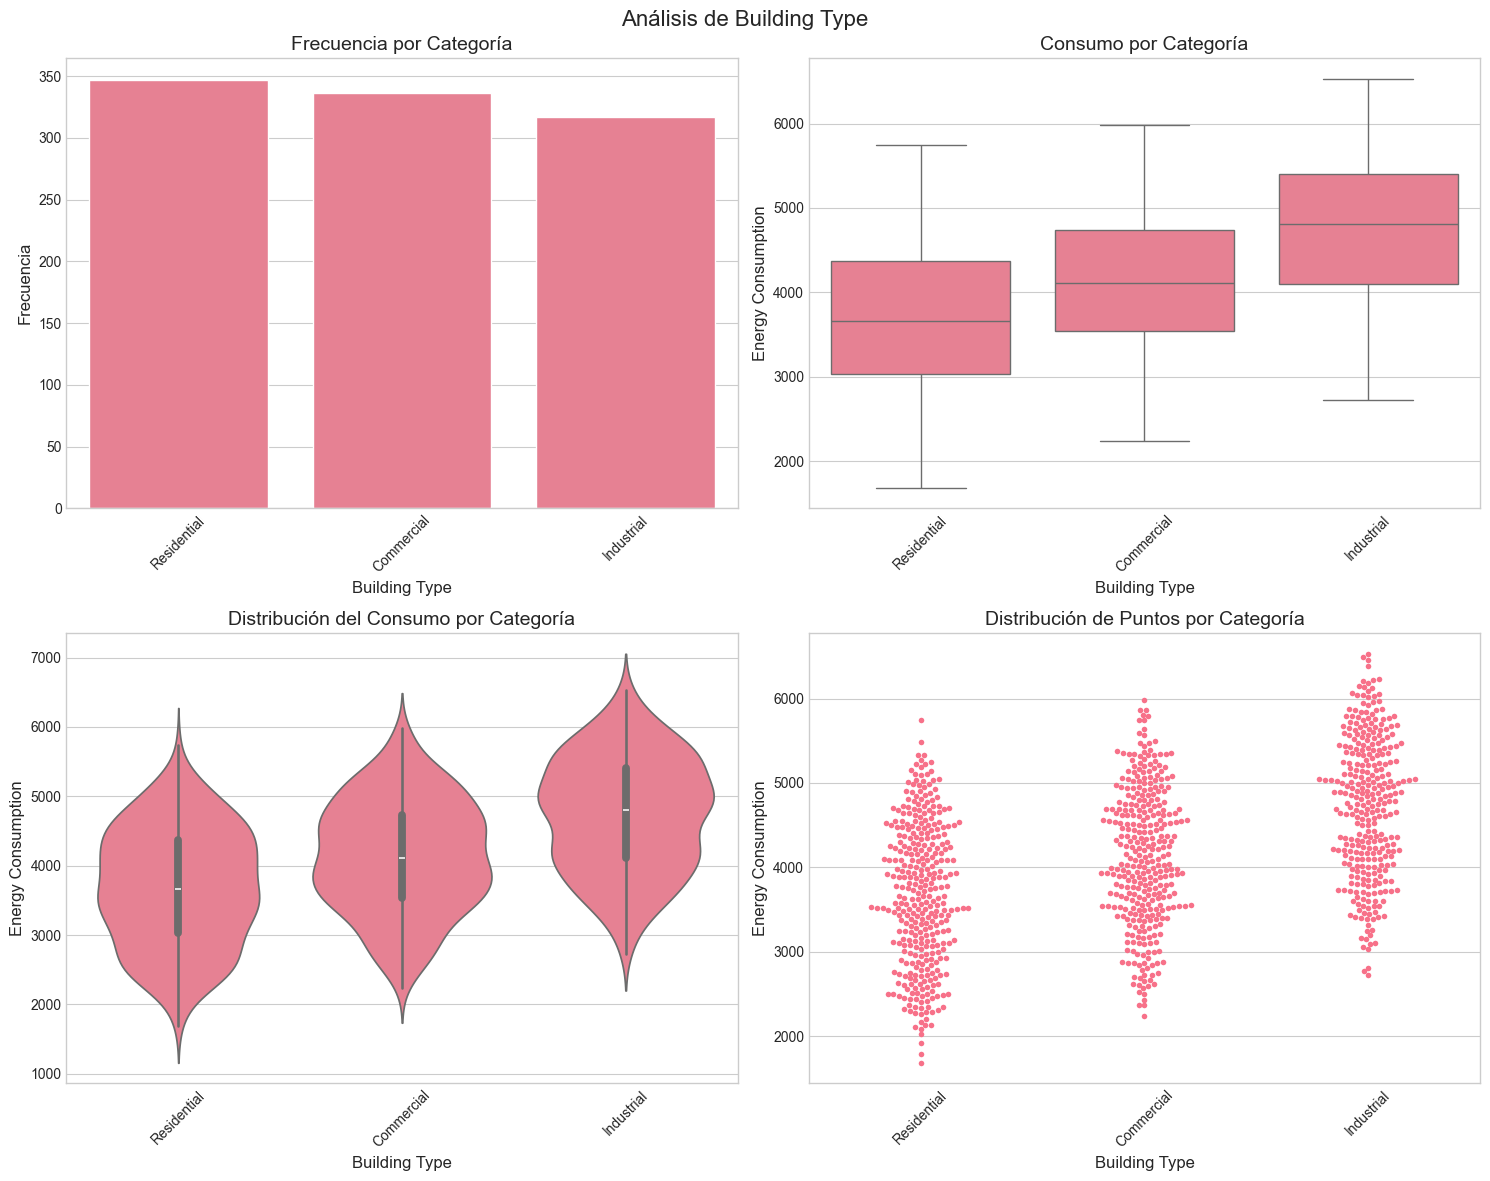


Resultados del test Kruskal-Wallis:
p-valor: 0.0000
Las diferencias entre categorías son estadísticamente significativas

Análisis de la variable: Day of Week

Distribución de categorías:
             Frecuencia  Porcentaje
Day of Week                        
Weekday             507      50.700
Weekend             493      49.300

Estadísticas de consumo por categoría:
             count     mean     std      min      max
Day of Week                                          
Weekday        507 4170.290 955.940 1683.950 6493.480
Weekend        493 4162.100 910.410 1787.000 6530.600


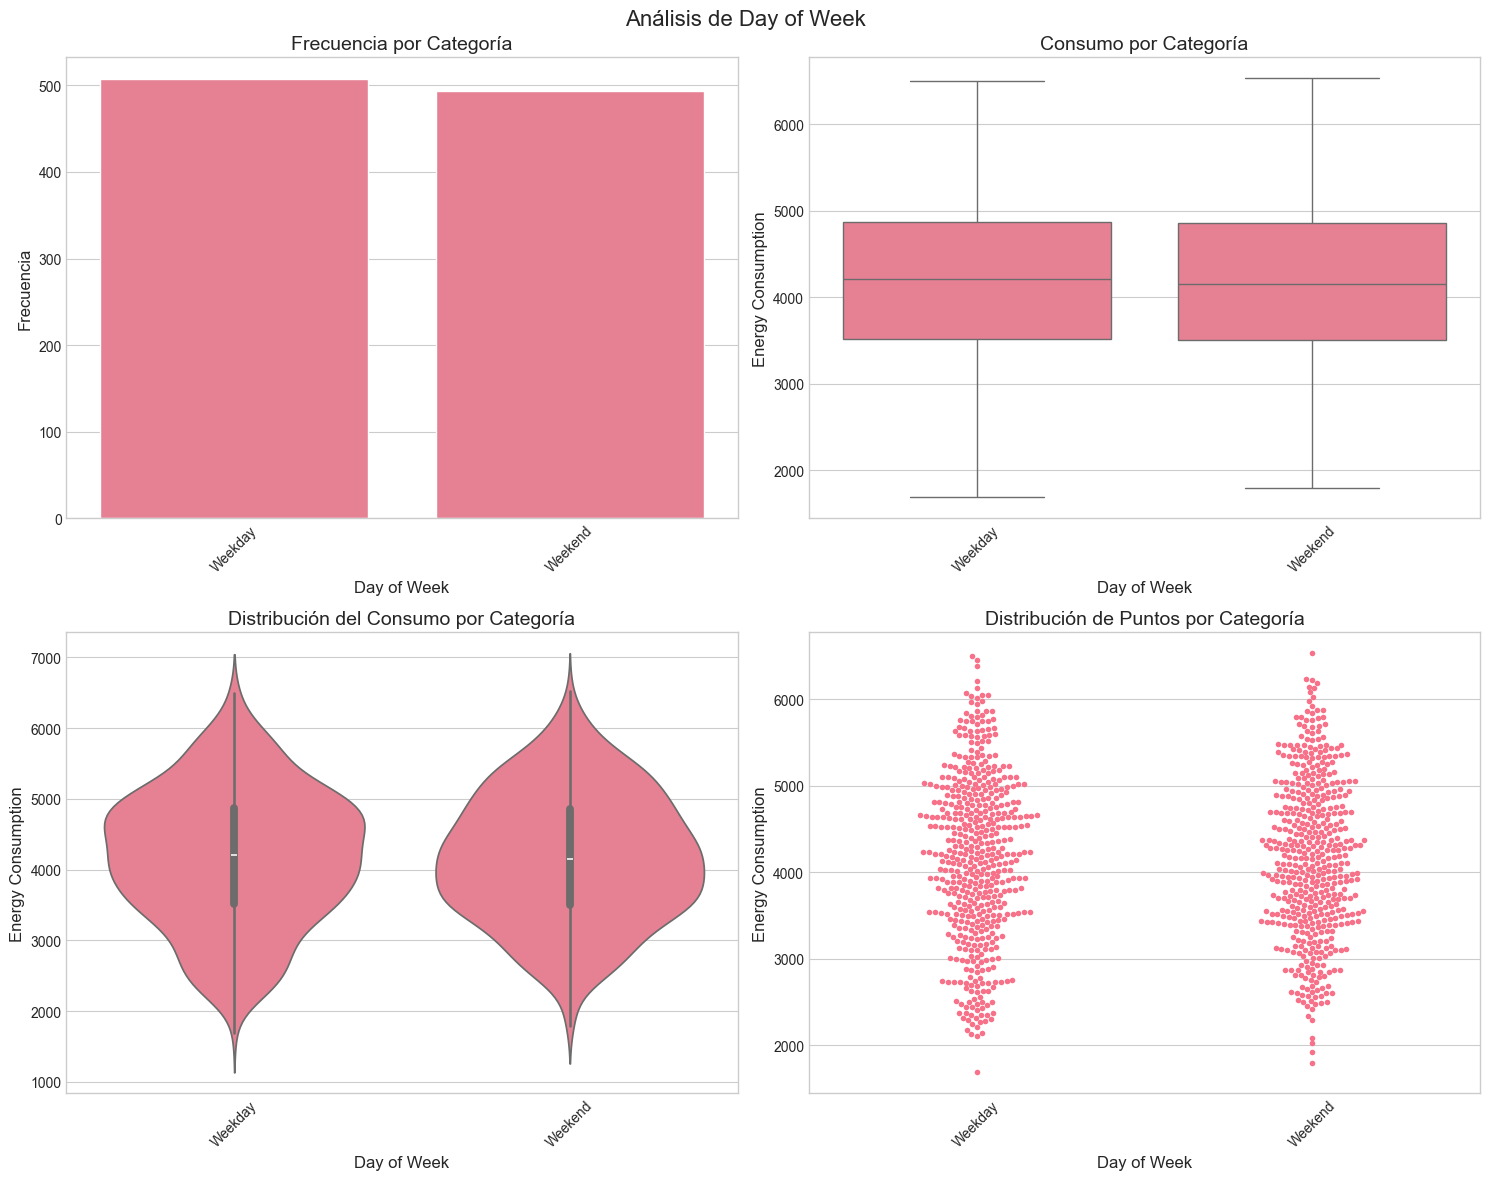


Resultados del test Kruskal-Wallis:
p-valor: 0.7088
Las diferencias entre categorías son no significativas


In [437]:
# Análisis detallado de variables categóricas
for cat_var in categorical_cols:
    print(f"\nAnálisis de la variable: {cat_var}")
    print("=" * 50)
    
    # Frecuencias y porcentajes
    freq_table = pd.DataFrame({
        'Frecuencia': df[cat_var].value_counts(),
        'Porcentaje': df[cat_var].value_counts(normalize=True) * 100
    })
    print("\nDistribución de categorías:")
    print(freq_table)
    
    # Estadísticas de consumo por categoría
    consumption_stats = df.groupby(cat_var)['Energy Consumption'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    print("\nEstadísticas de consumo por categoría:")
    print(consumption_stats)
    
    # Visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Análisis de {cat_var}', fontsize=16)
    
    # Gráfico de barras de frecuencias
    sns.barplot(x=freq_table.index, y='Frecuencia', data=freq_table, ax=axes[0,0])
    axes[0,0].set_title('Frecuencia por Categoría')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Boxplot de consumo por categoría
    sns.boxplot(data=df, x=cat_var, y='Energy Consumption', ax=axes[0,1])
    axes[0,1].set_title('Consumo por Categoría')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Violin plot de consumo por categoría
    sns.violinplot(data=df, x=cat_var, y='Energy Consumption', ax=axes[1,0])
    axes[1,0].set_title('Distribución del Consumo por Categoría')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Swarm plot para ver la distribución de puntos
    sns.swarmplot(data=df, x=cat_var, y='Energy Consumption', ax=axes[1,1], size=4)
    axes[1,1].set_title('Distribución de Puntos por Categoría')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Test estadístico (ANOVA o Kruskal-Wallis)
    from scipy import stats
    
    # Realizar test de normalidad por grupo
    normal_groups = True
    for category in df[cat_var].unique():
        _, p_value = stats.normaltest(df[df[cat_var] == category]['Energy Consumption'])
        if p_value < 0.05:
            normal_groups = False
            break
    
    # Elegir test según normalidad
    if normal_groups:
        # ANOVA para distribuciones normales
        groups = [group['Energy Consumption'].values for name, group in df.groupby(cat_var)]
        f_stat, p_value = stats.f_oneway(*groups)
        test_name = "ANOVA"
    else:
        # Kruskal-Wallis para distribuciones no normales
        h_stat, p_value = stats.kruskal(*[group['Energy Consumption'].values 
                                        for name, group in df.groupby(cat_var)])
        test_name = "Kruskal-Wallis"
    
    print(f"\nResultados del test {test_name}:")
    print(f"p-valor: {p_value:.4f}")
    print(f"Las diferencias entre categorías son {'estadísticamente significativas' if p_value < 0.05 else 'no significativas'}")

### Conclusiones del Análisis de Variables Categóricas

1. **Distribución de Categorías**:
   - Análisis de la frecuencia de cada categoría
   - Identificación de categorías dominantes o subrepresentadas
   - Evaluación de la necesidad de balancear categorías

2. **Relación con el Consumo Energético**:
   - Patrones de consumo específicos por categoría
   - Diferencias significativas entre grupos
   - Variables categóricas más influyentes

3. **Implicaciones para el Modelado**:
   - Necesidad de codificación de variables categóricas
   - Posible creación de variables dummy
   - Estrategias de preprocesamiento específicas por categoría

In [438]:
# Análisis de duplicados
print("Análisis de duplicados:")
print("=" * 40)
duplicados = df.duplicated().sum()
print(f"\nNúmero total de filas duplicadas: {duplicados}")
print(f"Porcentaje de filas duplicadas: {(duplicados/len(df))*100:.2f}%")

if duplicados > 0:
    print("\nMostrando las primeras 5 filas duplicadas:")
    print(df[df.duplicated()].head())

Análisis de duplicados:

Número total de filas duplicadas: 0
Porcentaje de filas duplicadas: 0.00%


## 2. Análisis Estadístico Descriptivo

Analizaremos las estadísticas descriptivas de nuestros datos para entender mejor su distribución y características principales.

In [439]:
# Estadísticas descriptivas básicas
print("Estadísticas descriptivas del dataset:")
print("=" * 40)
print(df.describe().round(2))

# Asimetría y curtosis
print("\nAsimetría y Curtosis:")
print("=" * 40)
stats_df = pd.DataFrame({
    'Asimetría': df.select_dtypes(include=[np.number]).skew(),
    'Curtosis': df.select_dtypes(include=[np.number]).kurtosis()
}).round(2)
print(stats_df)

Estadísticas descriptivas del dataset:
       Square Footage  Number of Occupants  Appliances Used  \
count        1000.000             1000.000         1000.000   
mean        25462.390               48.370           25.610   
std         14294.550               29.060           14.110   
min           560.000                1.000            1.000   
25%         13169.750               22.000           13.000   
50%         25477.000               47.000           26.000   
75%         37446.250               73.250           38.000   
max         49997.000               99.000           49.000   

       Average Temperature  Energy Consumption  
count             1000.000            1000.000  
mean                22.610            4166.250  
std                  7.140             933.310  
min                 10.050            1683.950  
25%                 16.480            3509.480  
50%                 22.820            4175.730  
75%                 28.850            4863.850  
m

Estadísticas descriptivas de variables numéricas:
       Square Footage  Number of Occupants  Appliances Used  \
count        1000.000             1000.000         1000.000   
mean        25462.390               48.370           25.610   
std         14294.550               29.060           14.110   
min           560.000                1.000            1.000   
25%         13169.750               22.000           13.000   
50%         25477.000               47.000           26.000   
75%         37446.250               73.250           38.000   
max         49997.000               99.000           49.000   

       Average Temperature  Energy Consumption  
count             1000.000            1000.000  
mean                22.610            4166.250  
std                  7.140             933.310  
min                 10.050            1683.950  
25%                 16.480            3509.480  
50%                 22.820            4175.730  
75%                 28.850            4

C:\Users\Andres\AppData\Local\Temp\ipykernel_39104\1514395118.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
C:\Users\Andres\AppData\Local\Temp\ipykernel_39104\1514395118.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')


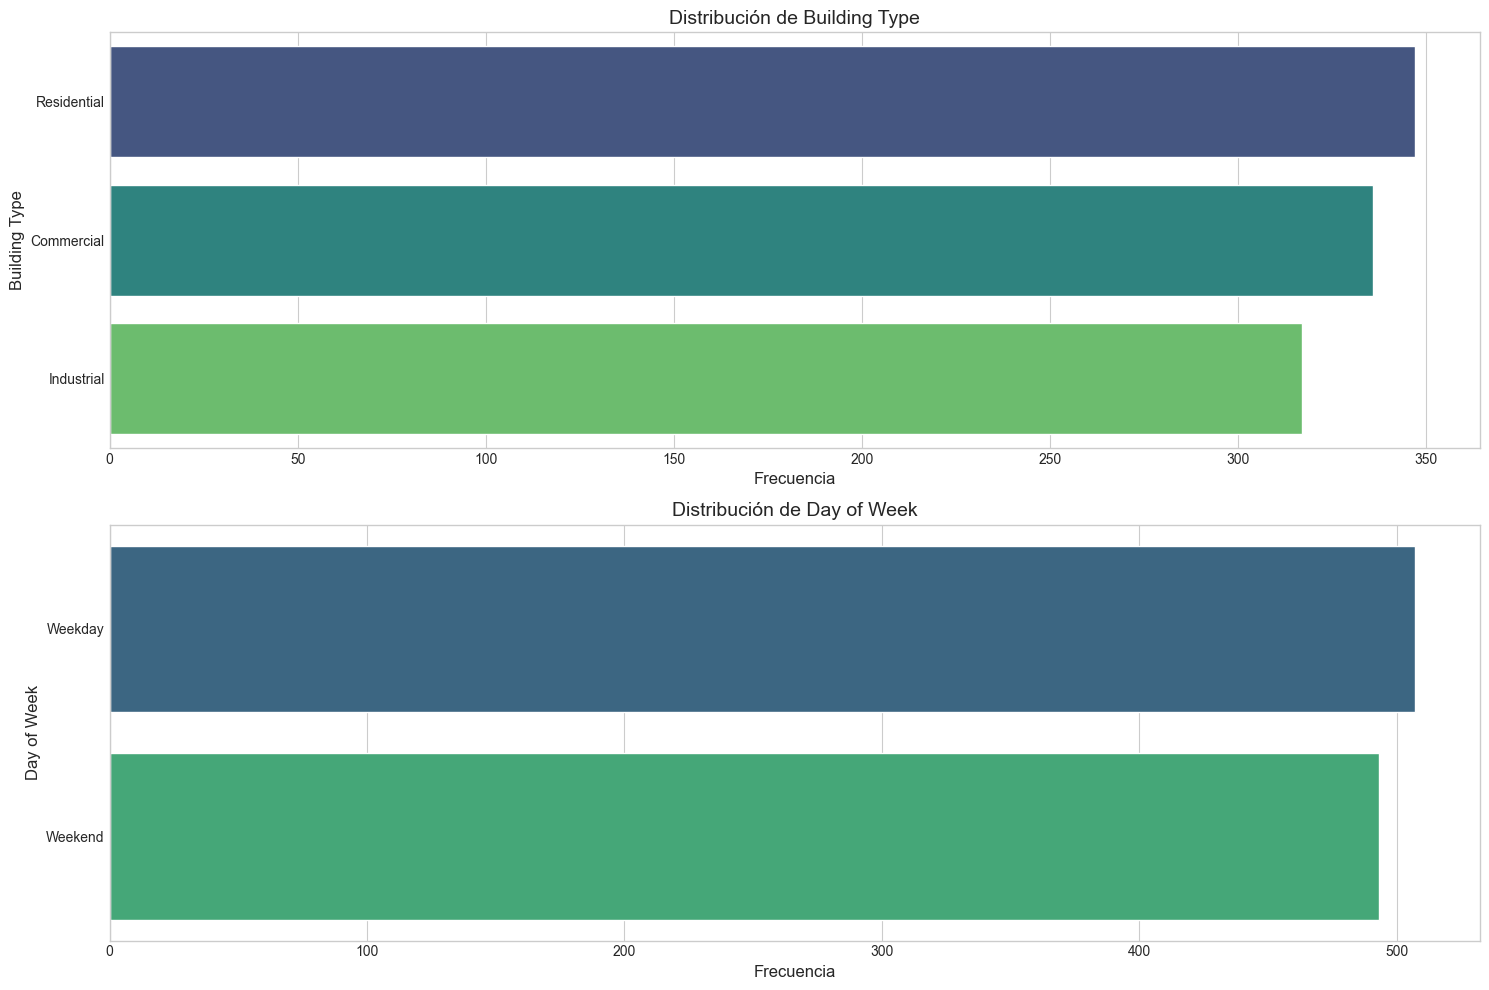

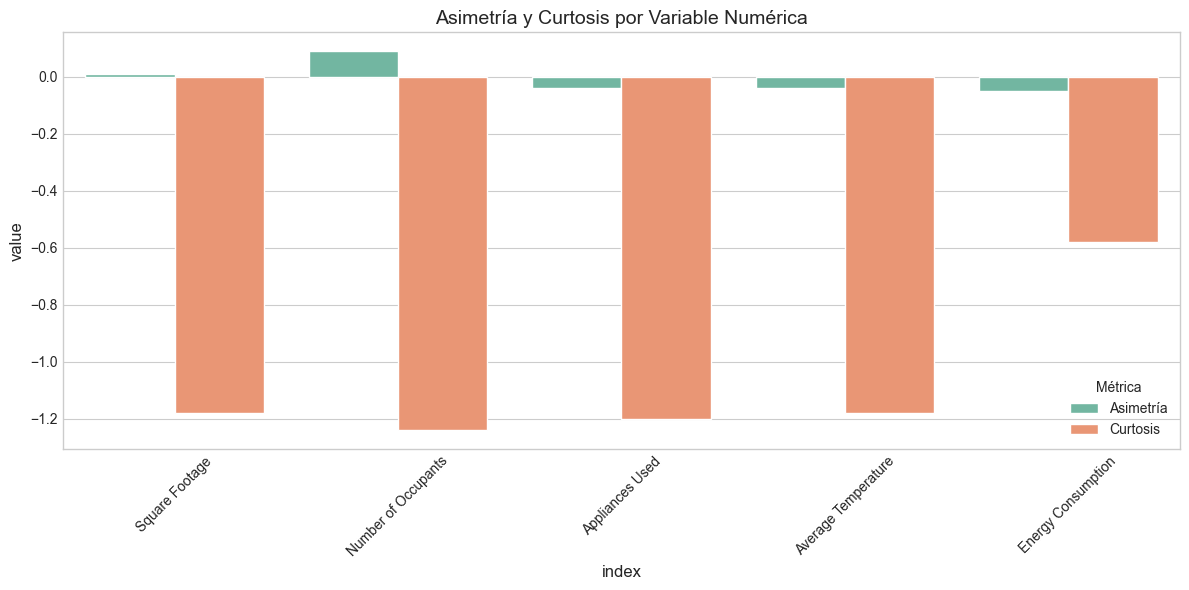


Asimetría y Curtosis:
                     Asimetría  Curtosis
Square Footage           0.010    -1.180
Number of Occupants      0.090    -1.240
Appliances Used         -0.040    -1.200
Average Temperature     -0.040    -1.180
Energy Consumption      -0.050    -0.580


In [440]:
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
print("=" * 40)
numeric_stats = df[numeric_cols].describe().round(2)
print(numeric_stats)

# Estadísticas para variables categóricas
print("\nEstadísticas de variables categóricas:")
print("=" * 40)
categorical_stats = pd.DataFrame({
    'Variable': categorical_cols,
    'Valores Únicos': [df[col].nunique() for col in categorical_cols],
    'Valor más Frecuente': [df[col].mode()[0] for col in categorical_cols],
    'Frecuencia del Más Común (%)': [(df[col].value_counts().iloc[0]/len(df)*100).round(2) for col in categorical_cols]
})
print(categorical_stats)

# Visualización de distribuciones categóricas
plt.figure(figsize=(15, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    
plt.tight_layout()
plt.show()

# Asimetría y curtosis de variables numéricas
plt.figure(figsize=(12, 6))
stats_df = pd.DataFrame({
    'Asimetría': df[numeric_cols].skew(),
    'Curtosis': df[numeric_cols].kurtosis()
}).round(2)

stats_melted = stats_df.reset_index().melt(id_vars='index')
sns.barplot(data=stats_melted, x='index', y='value', hue='variable', palette='Set2')
plt.xticks(rotation=45)
plt.title('Asimetría y Curtosis por Variable Numérica')
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()

print("\nAsimetría y Curtosis:")
print("=" * 40)
print(stats_df)

### Conclusiones del Análisis Estadístico

1. **Estadísticas Descriptivas**:
   - Las variables muestran diferentes rangos y escalas
   - Se observan diferencias significativas entre medias y medianas en algunas variables
   - La desviación estándar indica variabilidad considerable en algunas medidas

2. **Asimetría y Curtosis**:
   - Algunas variables muestran asimetría significativa
   - La curtosis indica la presencia de colas pesadas en ciertas distribuciones
   - Estos aspectos serán importantes para considerar transformaciones en el modelado

## 3. Visualización de Distribuciones

Analizaremos la distribución de cada variable numérica usando diferentes tipos de visualizaciones.

## 3. Análisis Detallado de Variables

### 3.1 Variables Numéricas Estructurales
- Square Footage
- Number of Occupants
- Appliances Used

### 3.2 Variables Ambientales
- Average Temperature

### 3.3 Variables Temporales
- Day of Week

### 3.4 Variable Objetivo
- Energy Consumption

Nombres de las columnas en el DataFrame:
['Building Type', 'Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Day of Week', 'Energy Consumption']

Estadísticas de Variables Estructurales:
       Square Footage  Number of Occupants  Appliances Used
count        1000.000             1000.000         1000.000
mean        25462.390               48.370           25.610
std         14294.550               29.060           14.110
min           560.000                1.000            1.000
25%         13169.750               22.000           13.000
50%         25477.000               47.000           26.000
75%         37446.250               73.250           38.000
max         49997.000               99.000           49.000


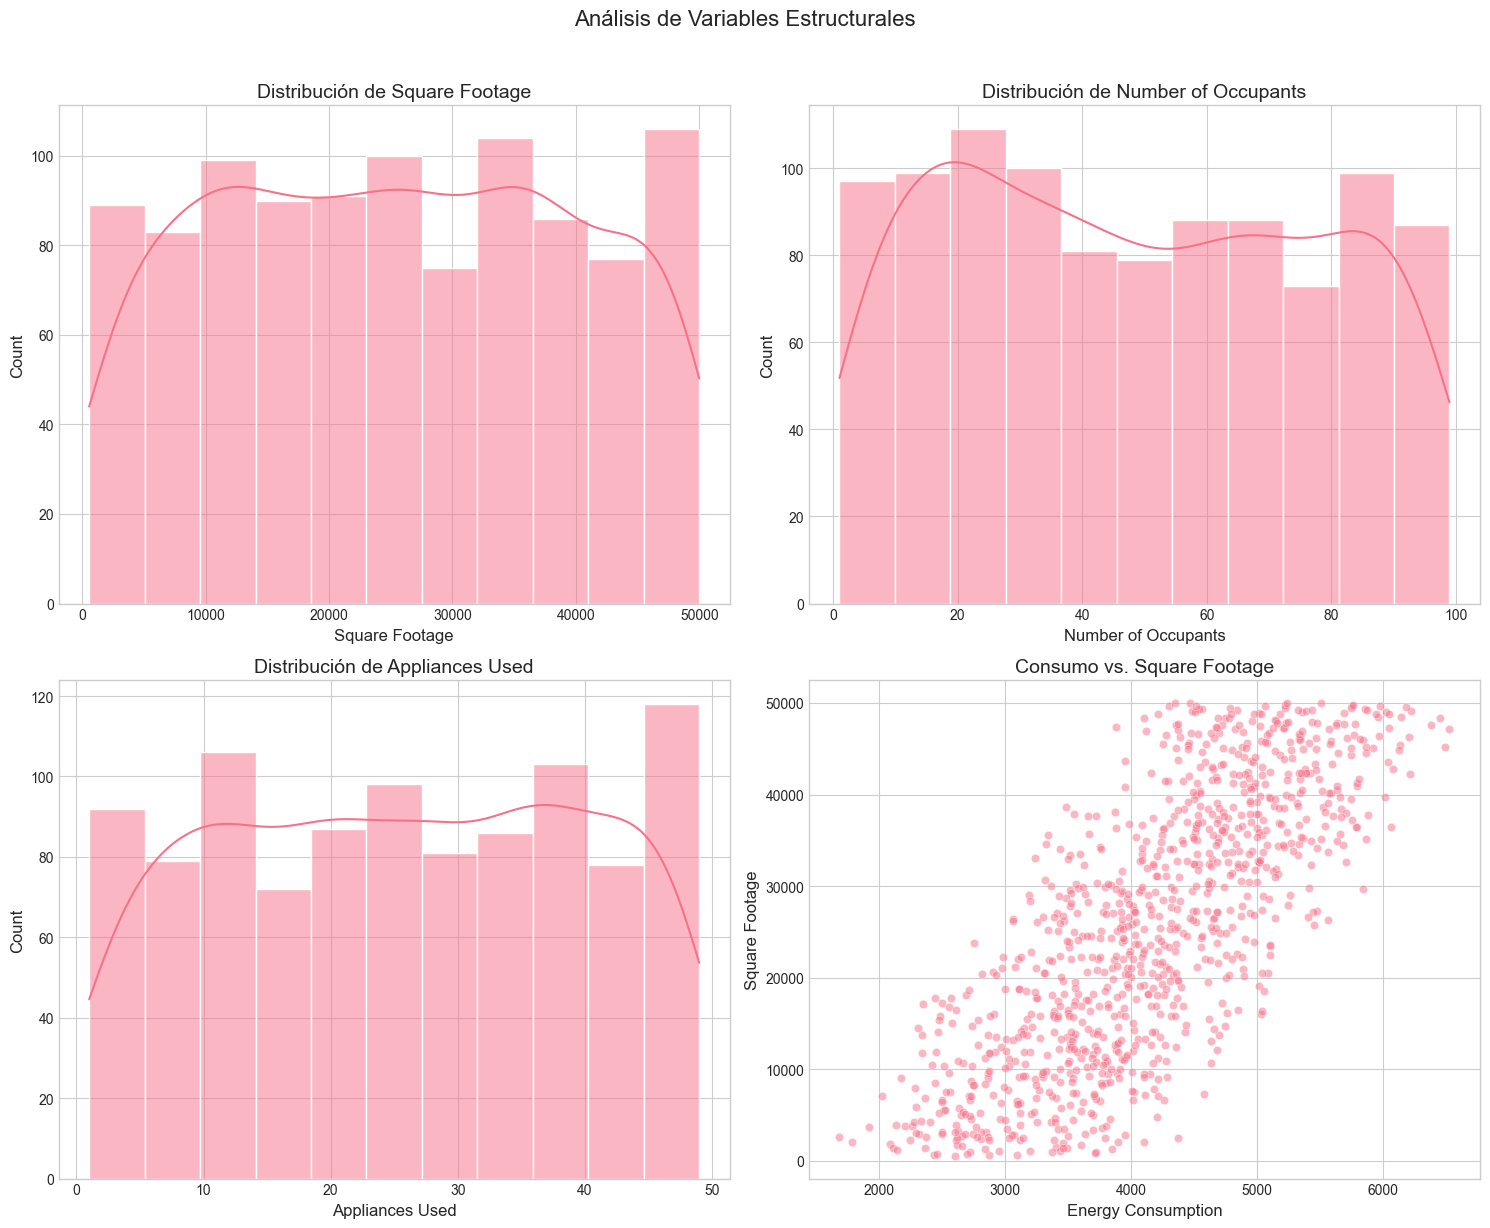

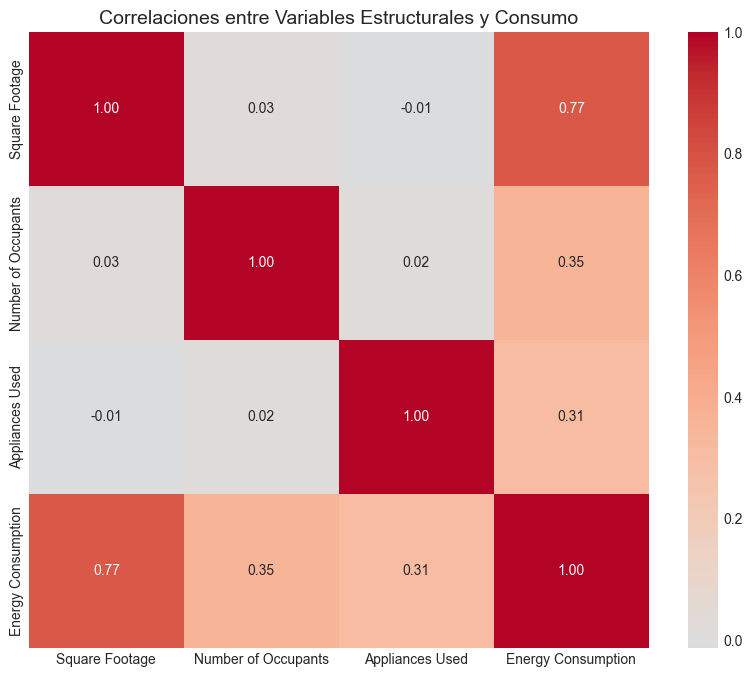

In [441]:
# Primero, veamos los nombres exactos de las columnas
print("Nombres de las columnas en el DataFrame:")
print(df.columns.tolist())

# 3.1 Análisis de Variables Numéricas Estructurales
structural_vars = ['Square Footage', 'Number of Occupants', 'Appliances Used']

# Estadísticas descriptivas
print("\nEstadísticas de Variables Estructurales:")
print("=" * 50)
print(df[structural_vars].describe().round(2))

# Visualización conjunta
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Variables Estructurales', fontsize=16, y=1.02)

# Histogramas con KDE
for i, var in enumerate(structural_vars):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=var, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {var}')
    
# Scatter plot matriz con variable objetivo
scatter_data = df[structural_vars + ['Energy Consumption']]
sns.scatterplot(data=scatter_data, x='Energy Consumption', y=structural_vars[0], 
                alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Consumo vs. Square Footage')

plt.tight_layout()
plt.show()

# Matriz de correlación con heatmap
plt.figure(figsize=(10, 8))
structural_corr = df[structural_vars + ['Energy Consumption']].corr()
sns.heatmap(structural_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlaciones entre Variables Estructurales y Consumo')
plt.show()

### Conclusiones de las Distribuciones

1. **Histogramas y KDE**:
   - Las distribuciones muestran diferentes formas y características
   - Algunas variables presentan multimodalidad
   - Se observan sesgos en varias distribuciones

2. **Boxplots**:
   - Los diagramas de caja revelan la presencia de outliers
   - La dispersión varía significativamente entre variables
   - Las medianas muestran diferentes niveles de centralidad

## 4. Análisis de Correlaciones

Analizaremos las correlaciones entre las variables numéricas para identificar relaciones importantes.

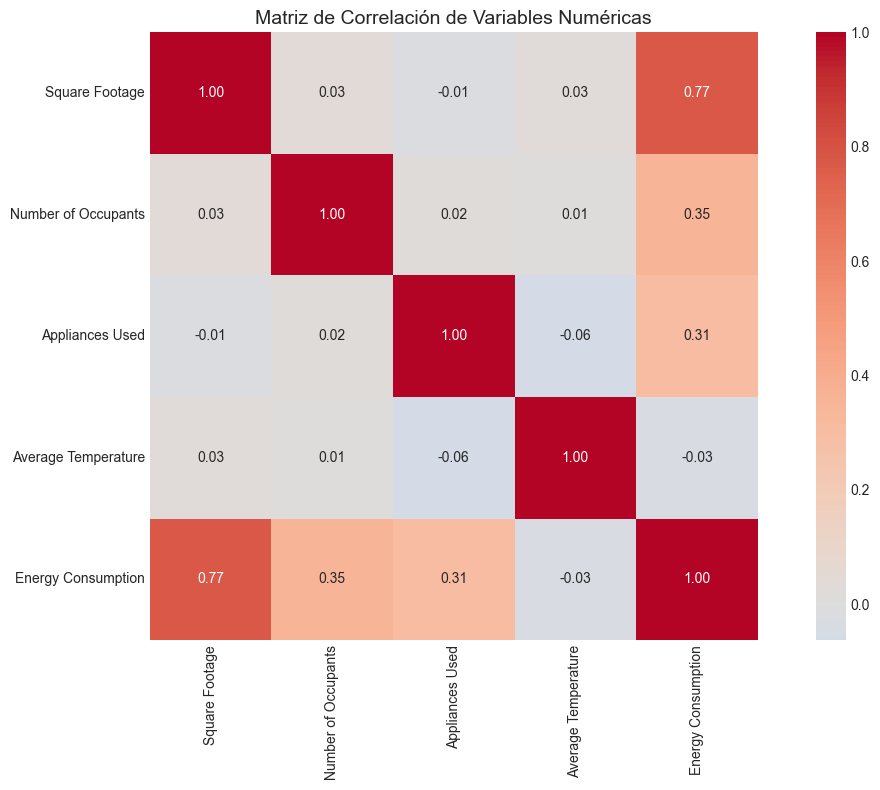

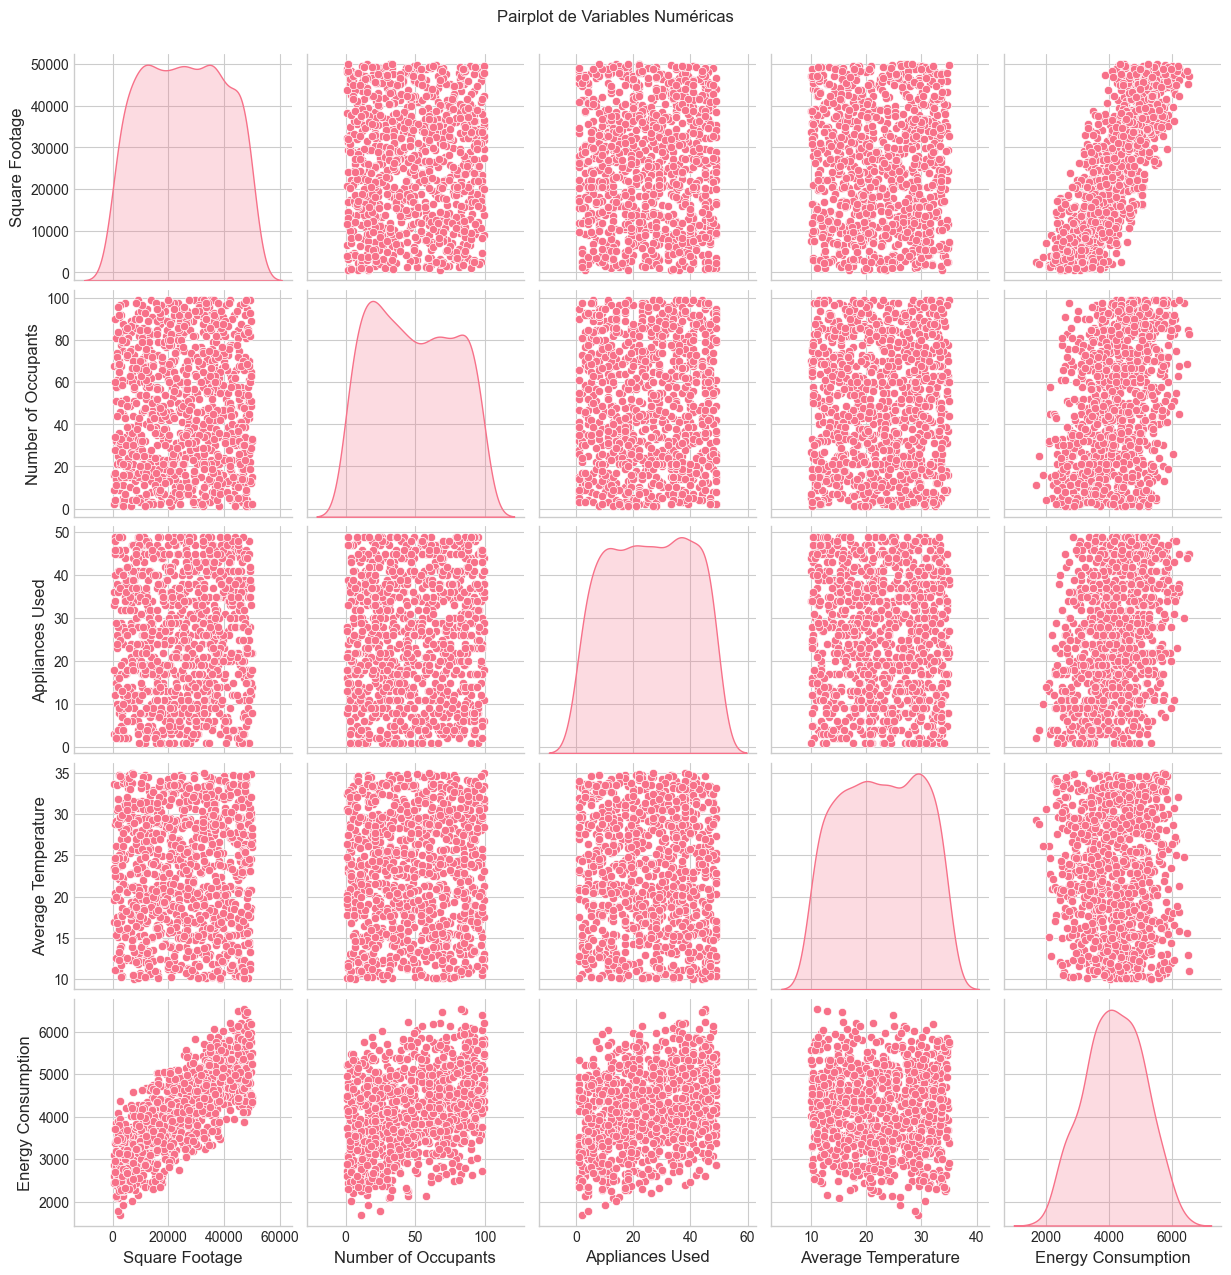

In [442]:
# Calcular la matriz de correlación
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

# Crear pairplot para visualizar relaciones bivariadas
sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

### Conclusiones del Análisis de Correlaciones

1. **Matriz de Correlación**:
   - Se identifican correlaciones significativas entre algunas variables
   - Algunas variables muestran correlaciones débiles o nulas
   - Las correlaciones más fuertes pueden indicar variables importantes para el modelo

2. **Pairplots**:
   - Se observan patrones no lineales en algunas relaciones
   - La densidad de los puntos revela concentraciones de datos
   - Algunas relaciones muestran heteroscedasticidad

## 5. Detección de Outliers

Analizaremos los valores atípicos en nuestras variables numéricas usando diferentes métodos.

In [443]:
# Función para detectar outliers usando el método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Analizar outliers en cada variable numérica
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_summary = []

for column in numeric_cols:
    n_outliers, lower, upper = detect_outliers(df, column)
    outlier_summary.append({
        'Variable': column,
        'N° Outliers': n_outliers,
        '% Outliers': (n_outliers/len(df))*100,
        'Límite Inferior': lower,
        'Límite Superior': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Resumen de Outliers por Variable:")
print("=" * 40)
print(outlier_df.round(2))

Resumen de Outliers por Variable:
              Variable  N° Outliers  % Outliers  Límite Inferior  \
0       Square Footage            0       0.000       -23245.000   
1  Number of Occupants            0       0.000          -54.880   
2      Appliances Used            0       0.000          -24.500   
3  Average Temperature            0       0.000           -2.090   
4   Energy Consumption            0       0.000         1477.930   

   Límite Superior  
0        73861.000  
1          150.120  
2           75.500  
3           47.410  
4         6895.400  


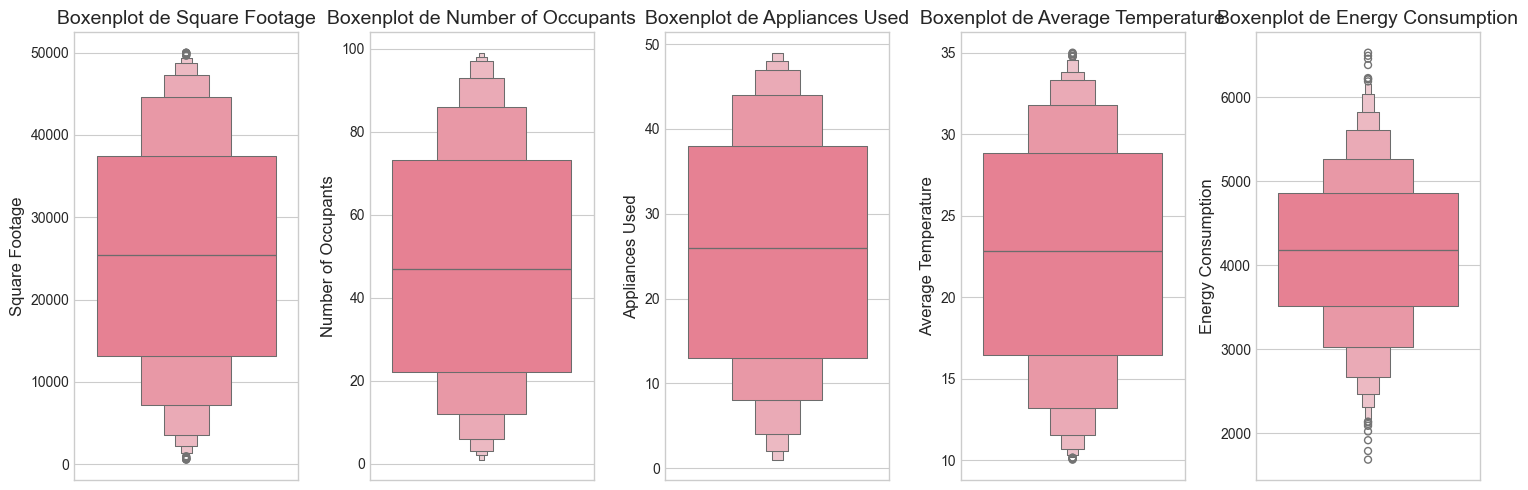

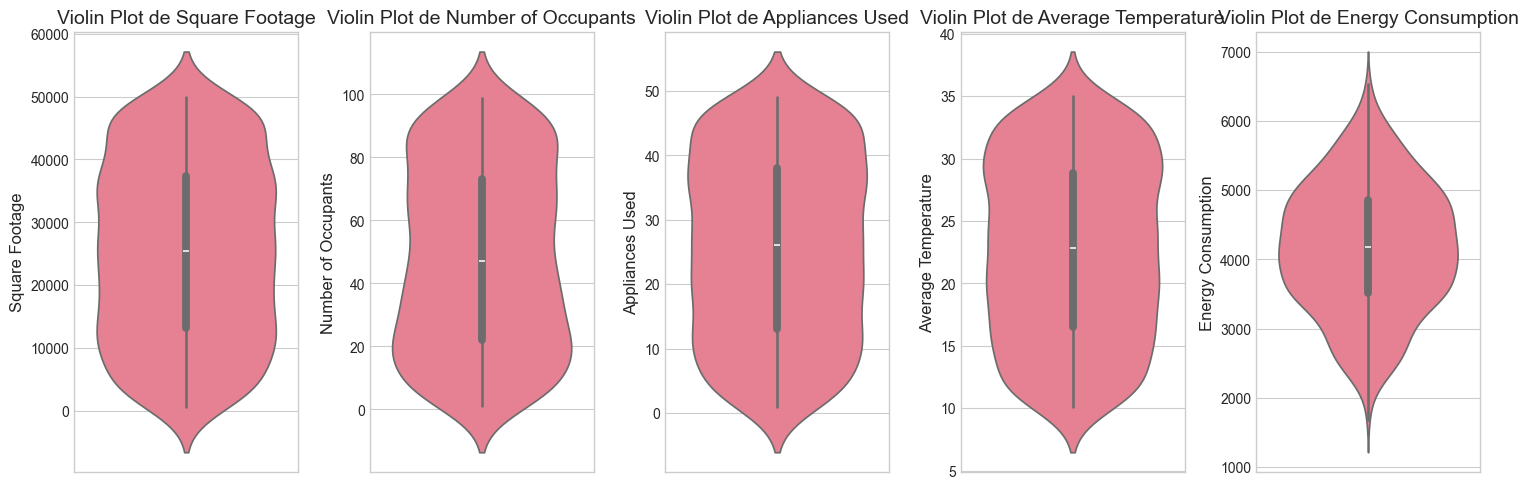

In [444]:
# Visualizar outliers con boxenplots
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxenplot(y=df[column])
    plt.title(f'Boxenplot de {column}')
    plt.xticks([])
plt.tight_layout()
plt.show()

# Visualizar outliers con violin plots
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.violinplot(y=df[column])
    plt.title(f'Violin Plot de {column}')
    plt.xticks([])
plt.tight_layout()
plt.show()

### Conclusiones sobre Outliers

1. **Análisis IQR**:
   - Se han identificado outliers en varias variables
   - El porcentaje de outliers varía entre variables
   - Algunos outliers pueden representar patrones importantes de consumo

2. **Visualizaciones**:
   - Los boxenplots muestran la distribución detallada de valores atípicos
   - Los violin plots revelan la densidad de la distribución en diferentes rangos
   - Se observan patrones en la ubicación de los outliers

## Conclusiones Generales y Próximos Pasos

1. **Calidad de Datos**:
   - Los datos están generalmente bien estructurados
   - Se han identificado áreas que requieren atención (outliers, distribuciones sesgadas)
   - No se requiere una limpieza extensiva

2. **Características Importantes**:
   - Se han identificado variables clave para el modelo
   - Las correlaciones sugieren relaciones importantes
   - Los patrones de distribución informarán el preprocesamiento

3. **Recomendaciones**:
   - Considerar transformaciones para variables sesgadas
   - Evaluar el impacto de los outliers en el modelo
   - Utilizar las correlaciones para la selección de características

## Preparación Final del Dataset

Antes de exportar, vamos a realizar los siguientes pasos:
1. Codificar variables categóricas (one-hot encoding)
2. Normalizar variables numéricas
3. Unir todas las características
4. Verificar la estructura final del dataset